# Deep Learning with PyTorch: Zero-To-GANs
This Notebook contains codes and exercises of the course provided by `Jovian.ai`

## Importing necessary libraries

In [97]:
# importing necessary libraries
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

## Lesson 1: `PyTorch Basics and Gradient Descent`

**Topics covered in this lesson:** <br/>
### 1.1 PyTorch basics: Tensors, Gradients, and Autograd
### 1.2 Linear Regression & Gradient Descent from scratch
### 1.3 Using PyTorch Modules: nn.Linear & nn.functional

We begin by importing PyTorch

In [98]:
# Uncomment the command below if PyTorch is not installed
# !conda install pytorch cpuonly -c pytorch -y

In [99]:
import torch

In [100]:
torch.__version__

'1.13.1+cu117'

### 1.1 PyTorch basics: `Tensors, Gradients, and Autograd`

#### 1.1(a) Tensors

At its core, PyTorch is a library for processing tensors. A tensor is a number, vector, matrix or any n-dimensional array. Let's create a tensor with a single number:

In [101]:
# Number
t1 = torch.tensor(4.)
t1

tensor(4.)

`4.` is a shorthand for `4.0`. It is used to indicate to Python (and PyTorch) that you want to create a floating point number. We can verify this by checking the `dtype` attribute of our tensor:

In [102]:
t1.dtype

torch.float32

Let's try creating slightly more complex tensors:

In [103]:
# Vector
t2 = torch.tensor([1., 2, 3, 4])
t2

tensor([1., 2., 3., 4.])

In [104]:
# Matrix
t3 = torch.tensor([[5., 6], 
                   [7, 8], 
                   [9, 10]])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [105]:
# 3-dimensional array
t4 = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])
t4

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])

Tensors can have any number of dimensions, and different lengths along each dimension. We can inspect the length along each dimension using the `.shape` property of a tensor.

In [106]:
print(t1)
t1.shape

tensor(4.)


torch.Size([])

In [107]:
print(t2)
t2.shape

tensor([1., 2., 3., 4.])


torch.Size([4])

In [108]:
print(t3)
t3.shape

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])


torch.Size([3, 2])

In [109]:
print(t4)
t4.shape

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])


torch.Size([2, 2, 3])

#### 1.1(b) Tensor operations and gradients

We can combine tensors with the usual arithmetic operations. Let's look an example:

In [110]:
# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x, w, b

(tensor(3.), tensor(4., requires_grad=True), tensor(5., requires_grad=True))

We've created 3 tensors `x`, `w` and `b`, all numbers. `w` and `b` have an additional parameter `requires_grad` set to `True`. We'll see what it does in just a moment. 

Let's create a new tensor `y` by combining these tensors:

In [111]:
# Arithmetic operations
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

As expected, `y` is a tensor with the value `3 * 4 + 5 = 17`. What makes PyTorch special is that we can automatically compute the derivative of `y` w.r.t. the tensors that have `requires_grad` set to `True` i.e. w and b. To compute the derivatives, we can call the `.backward` method on our result `y`.

In [112]:
# Compute derivatives
y.backward()

The derivates of `y` w.r.t the input tensors are stored in the `.grad` property of the respective tensors.

In [113]:
# Display gradients
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


As expected, `dy/dw` has the same value as `x` i.e. `3`, and `dy/db` has the value `1`. Note that `x.grad` is `None`, because `x` doesn't have `requires_grad` set to `True`. 

The "grad" in `w.grad` stands for gradient, which is another term for derivative, used mainly when dealing with matrices. 

#### 1.1(c) Torch Functions
Apart from arithmetic operations, the `torch` module also contains many functions for creating and manipulating tensors.
Let's look at some examples

In [114]:
# Creates a Tensor with a fixed value for every element
t6 = torch.full((3,2),42)
t6

tensor([[42, 42],
        [42, 42],
        [42, 42]])

In [115]:
# Concatenates two Tensors with compatible shapes
t7 = torch.cat((t3,t6))
t7

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.],
        [42., 42.],
        [42., 42.],
        [42., 42.]])

In [116]:
# Computes the sin of each element
t8 = torch.sin(t7)
t8

tensor([[-0.9589, -0.2794],
        [ 0.6570,  0.9894],
        [ 0.4121, -0.5440],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165],
        [-0.9165, -0.9165]])

In [117]:
t8.shape

torch.Size([6, 2])

In [118]:
# Changes the shape of a Tensor
t9 = t8.reshape(3,2,2)
t9 

tensor([[[-0.9589, -0.2794],
         [ 0.6570,  0.9894]],

        [[ 0.4121, -0.5440],
         [-0.9165, -0.9165]],

        [[-0.9165, -0.9165],
         [-0.9165, -0.9165]]])

To learn more about Tensor operations, as there about `1000+` tensor operations, visit the documentation page here:
https://pytorch.org/docs/stable/torch.html

#### 1.1(d) Interoperability with Numpy

[Numpy](http://www.numpy.org/) is a popular open source library used for mathematical and scientific computing in Python. It enables efficient operations on large multi-dimensional arrays, and has a large ecosystem of supporting libraries:

* [Matplotlib](https://matplotlib.org/) for plotting and visualization
* [OpenCV](https://opencv.org/) for image and video processing
* [Pandas](https://pandas.pydata.org/) for file I/O and data analysis

Instead of reinventing the wheel, PyTorch interoperates really well with Numpy to leverage its existing ecosystem of tools and libraries.

In [119]:
import numpy as np

x = np.array([[1, 2], [3, 4.]])
x

array([[1., 2.],
       [3., 4.]])

We can convert a Numpy array to a PyTorch tensor using `torch.from_numpy`.

In [120]:
# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [121]:
x.dtype, y.dtype

(dtype('float64'), torch.float64)

So, x and y both are float64 but x is a `normal float64` integer whereas y is a `torch.float64`

We can also convert a PyTorch Tensor to a NumPy array, using the `.numpy` method of Tensor

In [122]:
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

The interoperability b/w PyTorch and NumPy is essential because most datasets we'll work on, will likely be read and preprocessed as NumPy arrays.
There are 2 main reasons as to why we need a library like PyTorch:
1. `Autograd:` the ability to automatically compute gradients(derivatives) for tensor operations is essential for training Deep Learning models.
2. `GPU Support:` while working with massive datasets and large models, PyTorch tensor operations can be performed efficiently using a GPU.

### 1.2 `Linear Regression & Gradient Descent`

#### 1.2(a) Introduction to Linear Regression

In this tutorial, we'll discuss one of the foundational algorithms in machine learning: *Linear regression*. We'll create a model that predicts crop yields for apples and oranges (*target variables*) by looking at the average temperature, rainfall, and humidity (*input variables or features*) in a region. Here's the training data:

![linear-regression-training-data](https://i.imgur.com/6Ujttb4.png)

In a linear regression model, each target variable is estimated to be a weighted sum of the input variables, offset by some constant, known as a bias :

```
yield_apple  = w11 * temp + w12 * rainfall + w13 * humidity + b1
yield_orange = w21 * temp + w22 * rainfall + w23 * humidity + b2
```

Visually, it means that the yield of apples is a linear or planar function of temperature, rainfall and humidity:

![linear-regression-graph](https://i.imgur.com/4DJ9f8X.png)


The *learning* part of linear regression is to figure out a set of weights `w11, w12,... w23, b1 & b2` using the training data, to make accurate predictions for new data. The _learned_ weights will be used to predict the yields for apples and oranges in a new region using the average temperature, rainfall, and humidity for that region. 

We'll _train_ our model by adjusting the weights slightly many times to make better predictions, using an optimization technique called *gradient descent*. Let's begin by importing Numpy and PyTorch.

#### 1.2(b) Training data

We can represent the training data using two matrices: `inputs` and `targets`, each with one row per observation, and one column per variable.

In [123]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

In [124]:
# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

We've separated the input and target variables because we'll operate on them separately. Also, we've created numpy arrays, because this is typically how you would work with training data: read some CSV files as numpy arrays, do some processing, and then convert them to PyTorch tensors.

Let's convert the arrays to PyTorch tensors.

In [125]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


#### 1.2(c) Linear regression model from scratch

The weights and biases (`w11, w12,... w23, b1 & b2`) can also be represented as matrices, initialized as random values. The first row of `w` and the first element of `b` are used to predict the first target variable, i.e., yield of apples, and similarly, the second for oranges.

In [126]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[ 0.8290, -0.0216, -0.9190],
        [-0.4644, -0.5870,  0.7651]], requires_grad=True)
tensor([0.4029, 0.1625], requires_grad=True)


`torch.randn` creates a tensor with the given shape, with elements picked randomly from a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) with mean 0 and standard deviation 1.

Our *model* is simply a function that performs a matrix multiplication of the `inputs` and the weights `w` (transposed) and adds the bias `b` (replicated for each observation).

![matrix-mult](https://i.imgur.com/WGXLFvA.png)

We can define the model as follows:

In [127]:
def model(x):
    return x @ w.t() + b

***`Note:`*** `@` represents matrix multiplication in PyTorch, and the `.t` method returns the transpose of a tensor.

The matrix obtained by passing the input data into the model is a set of predictions for the target variables.

In [128]:
inputs @ w.t() + b

tensor([[ 19.9550, -40.1648],
        [ 15.1238, -44.7831],
        [ 16.3293, -74.5172],
        [ 50.0282, -44.1344],
        [ -8.8011, -34.6725]], grad_fn=<AddBackward0>)

That is all it is, that is how our machine learning model works<br/>

`Ml Model -> takes the input -> performs matrix multiplication -> addes some bias -> churns out an output`

So this is how our Model makes Predictions

In [129]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[ 19.9550, -40.1648],
        [ 15.1238, -44.7831],
        [ 16.3293, -74.5172],
        [ 50.0282, -44.1344],
        [ -8.8011, -34.6725]], grad_fn=<AddBackward0>)


Let's compare the predictions of our model with the actual targets.

In [130]:
# Compare with targets
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


You can see a big difference between our model's predictions and the actual targets because we've initialized our model with random weights and biases. Obviously, we can't expect a randomly initialized model to *just work*.

#### 1.2(d) Loss function

Before we improve our model, we need a way to evaluate how well our model is performing. We can compare the model's predictions with the actual targets using the following method:

* Calculate the difference between the two matrices (`preds` and `targets`).
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.

The result is a single number, known as the **mean squared error** (MSE).

In [131]:
# diff here is a difference matrix we store it in a variable or directly methods of tensor as follows
# diff = preds - targets
mean_square_error = torch.sum((preds - targets) * (preds - targets)) / (preds - targets).numel()
mean_square_error

tensor(13611.5654, grad_fn=<DivBackward0>)

`torch.sum` returns the sum of all the elements in a tensor. The `.numel` method of a tensor returns the number of elements in a tensor. Let's compute the mean squared error for the current predictions of our model.

In [132]:
# MSE loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

In [133]:
# Compute loss
loss = mse(preds, targets)
print(loss)

tensor(13611.5654, grad_fn=<DivBackward0>)


Here’s how we can interpret the result: ***On average, each element in the prediction differs from the actual target by the square root of the loss***. And that’s pretty bad, considering the numbers we are trying to predict are themselves in the range 50–200. The result is called the *`loss`* because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

#### 1.2(e) Compute gradients

With PyTorch, we can automatically compute the gradient or derivative of the loss w.r.t. to the weights and biases because they have `requires_grad` set to `True`. We'll see how this is useful in just a moment.

In [134]:
# Compute gradients
loss.backward()

The gradients are stored in the `.grad` property of the respective tensors. Note that the derivative of the loss w.r.t. the weights matrix is itself a matrix with the same dimensions.

In [135]:
# Gradients for weights
print(w)
print(w.grad)

tensor([[ 0.8290, -0.0216, -0.9190],
        [-0.4644, -0.5870,  0.7651]], requires_grad=True)
tensor([[ -4482.7520,  -6299.5352,  -3701.9875],
        [-11648.2803, -13251.7207,  -7972.4512]])


#### 1.2(f) Adjust weights and biases to reduce the loss

The loss is a [quadratic function](https://en.wikipedia.org/wiki/Quadratic_function) of our weights and biases, and our objective is to find the set of weights where the loss is the lowest. If we plot a graph of the loss w.r.t any individual weight or bias element, it will look like the figure shown below. An important insight from calculus is that the gradient indicates the rate of change of the loss, i.e., the loss function's [slope](https://en.wikipedia.org/wiki/Slope) w.r.t. the weights and biases.

If a gradient element is **positive**:

* **increasing** the weight element's value slightly will **increase** the loss
* **decreasing** the weight element's value slightly will **decrease** the loss

![postive-gradient](https://i.imgur.com/WLzJ4xP.png)

If a gradient element is **negative**:

* **increasing** the weight element's value slightly will **decrease** the loss
* **decreasing** the weight element's value slightly will **increase** the loss

![negative=gradient](https://i.imgur.com/dvG2fxU.png)

The increase or decrease in the loss by changing a weight element is proportional to the gradient of the loss w.r.t. that element. This observation forms the basis of _the gradient descent_ optimization algorithm that we'll use to improve our model (by _descending_ along the _gradient_).

We can subtract from each weight element a small quantity proportional to the derivative of the loss w.r.t. that element to reduce the loss slightly.

In [136]:
w
w.grad

tensor([[ -4482.7520,  -6299.5352,  -3701.9875],
        [-11648.2803, -13251.7207,  -7972.4512]])

So as we can see, the grads or the derivatives of `w`. <br/>
If the derivatives are `negative` then that means the `rate of change is decreasing`, vice versa.<br/>
If the derivatives are `negative` we need to slightly `increase the weights`, and if it is `positive` we need to slightly `decrease the weights`.

In [137]:
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5

In [138]:
w,b

(tensor([[ 0.8738,  0.0414, -0.8820],
         [-0.3479, -0.4545,  0.8448]], requires_grad=True),
 tensor([0.4035, 0.1639], requires_grad=True))

We multiply the gradients with a very small number (`10^-5` in this case) to ensure that we don't modify the weights by a very large amount. We want to take a small step in the downhill direction of the gradient, not a giant leap. This number is called the *learning rate* of the algorithm. 

We use `torch.no_grad` to indicate to PyTorch that we shouldn't track, calculate, or modify gradients while updating the weights and biases.

In [139]:
# Let's verify that the loss is actually lower
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(9528.3418, grad_fn=<DivBackward0>)


Before we proceed, we reset the gradients to zero by invoking the `.zero_()` method. We need to do this because PyTorch accumulates gradients. Otherwise, the next time we invoke `.backward` on the loss, the new gradient values are added to the existing gradients, which may lead to unexpected results.

In [140]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


***`Gradient Descent:`*** In essense it is just taking some random weights and using the gradients to identify how to adjust them slightly, to reduce the loss.

#### 1.2(g) Train the model using gradient descent

As seen above, we reduce the loss and improve our model using the gradient descent optimization algorithm. Thus, we can _train_ the model using the following steps:

1. Generate predictions

2. Calculate the loss

3. Compute gradients w.r.t the weights and biases

4. Adjust the weights by subtracting a small quantity proportional to the gradient

5. Reset the gradients to zero

Let's implement the above step by step.

In [141]:
# Step 1: Generate Predictions
preds = model(inputs)
print(preds)

tensor([[ 29.0405, -19.3534],
        [ 27.1166, -17.4179],
        [ 30.8184, -42.0005],
        [ 58.6797, -23.6037],
        [  2.9316,  -8.3314]], grad_fn=<AddBackward0>)


In [142]:
# Step 2: Calculate the loss
loss = mse(preds,targets)
print(loss)

tensor(9528.3418, grad_fn=<DivBackward0>)


In [143]:
# Step 3: Compute Gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[ -3541.3242,  -5278.7402,  -3073.9939],
        [ -9498.2627, -10937.4590,  -6545.3018]])
tensor([ -46.4826, -114.1414])


In [144]:
# Step 4: Adjust weights and reset the gradients
with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()    

In [145]:
# Print the new weights and biases
print(w)
print(b)

tensor([[ 0.9092,  0.0942, -0.8513],
        [-0.2529, -0.3451,  0.9103]], requires_grad=True)
tensor([0.4040, 0.1650], requires_grad=True)


With the new weights and biases, the model should have a lower loss.

In [146]:
# Step 5: with new weights and biases calculate the loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(6772.5767, grad_fn=<DivBackward0>)


We have already achieved a significant reduction in the loss merely by adjusting the weights and biases slightly using gradient descent.

#### 1.2(h) Train for multiple epochs

To reduce the loss further, we can repeat the process of adjusting the weights and biases using the gradients multiple times. Each iteration is called an _epoch_. Let's train the model for 100 epochs.

In [147]:
# Train for 100 epochs
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

Once again, let's verify that the loss is now lower:

In [148]:
# Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(365.4839, grad_fn=<DivBackward0>)


The loss is now much lower than its initial value. Let's look at the model's predictions and compare them with the targets.

In [149]:
# Predictions
preds

tensor([[ 64.9513,  73.3087],
        [ 78.5562, 105.6495],
        [114.4798, 116.8119],
        [ 65.0464,  54.5839],
        [ 69.9926, 117.5811]], grad_fn=<AddBackward0>)

In [150]:
# Targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

The predictions are now quite close to the target variables. We can get even better results by training for a few more epochs. 

### 1.3 Using PyTorch modules: `nn.Linear & nn.functional`

#### 1.3(a) Linear regression using PyTorch built-ins

We've implemented linear regression & gradient descent model using some basic tensor operations. However, since this is a common pattern in deep learning, PyTorch provides several built-in functions and classes to make it easy to create and train models with just a few lines of code.

Let's begin by importing the `torch.nn` package from PyTorch, which contains utility classes for building neural networks.

In [151]:
import torch.nn as nn

As before, we represent the inputs and targets and matrices.

In [152]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70], 
                   [74, 66, 43], 
                   [91, 87, 65], 
                   [88, 134, 59], 
                   [101, 44, 37], 
                   [68, 96, 71], 
                   [73, 66, 44], 
                   [92, 87, 64], 
                   [87, 135, 57], 
                   [103, 43, 36], 
                   [68, 97, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119],
                    [57, 69], 
                    [80, 102], 
                    [118, 132], 
                    [21, 38], 
                    [104, 118], 
                    [57, 69], 
                    [82, 100], 
                    [118, 134], 
                    [20, 38], 
                    [102, 120]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [153]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [ 74.,  66.,  43.],
        [ 91.,  87.,  65.],
        [ 88., 134.,  59.],
        [101.,  44.,  37.],
        [ 68.,  96.,  71.],
        [ 73.,  66.,  44.],
        [ 92.,  87.,  64.],
        [ 87., 135.,  57.],
        [103.,  43.,  36.],
        [ 68.,  97.,  70.]])

We are using 15 training examples to illustrate how to work with large datasets in small batches. 

#### 1.3(b) Dataset and DataLoader

We'll create a `TensorDataset`, which allows access to rows from `inputs` and `targets` as tuples, and provides standard APIs for working with many different types of datasets in PyTorch.

In [154]:
from torch.utils.data import TensorDataset

In [155]:
# Define dataset
train_ds = TensorDataset(inputs, targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

The `TensorDataset` allows us to access a small section of the training data using the array indexing notation (`[0:3]` in the above code). It returns a tuple with two elements. The first element contains the input variables for the selected rows, and the second contains the targets.

We'll also create a `DataLoader`, which can split the data into batches of a predefined size while training. It also provides other utilities like shuffling and random sampling of the data.

In [156]:
from torch.utils.data import DataLoader

# Define data loader
batch_size = 5
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

We can use the data loader in a `for` loop. Let's look at an example.

In [157]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[102.,  43.,  37.],
        [ 68.,  97.,  70.],
        [ 73.,  66.,  44.],
        [ 87., 134.,  58.],
        [ 73.,  67.,  43.]])
tensor([[ 22.,  37.],
        [102., 120.],
        [ 57.,  69.],
        [119., 133.],
        [ 56.,  70.]])


In each iteration, the data loader returns one batch of data with the given batch size. If `shuffle` is set to `True`, it shuffles the training data before creating batches. Shuffling helps randomize the input to the optimization algorithm, leading to a faster reduction in the loss.

#### 1.3(c) nn.Linear

Instead of initializing the weights & biases manually, we can define the model using the `nn.Linear` class from PyTorch, which does it automatically.

In [158]:
# Define the Model
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.4023, -0.0712,  0.1074],
        [ 0.3641,  0.3323, -0.5128]], requires_grad=True)
Parameter containing:
tensor([-0.5404, -0.3378], requires_grad=True)


***`nn.Linear(3,2):`*** is the way we specify the number of inputs and the number of outputs that we going to get out of it. <br/>
* So we have 3 Inputs - Temperature, Rainfall, and Humidity.<br/>
* And 2 Outputs - Yield of Apples and Yield of Oranges.

***`nn.Linear:`*** Is the linear layer of a neural network, which is a weights and bias matrix bundled into this object which can also be used as a function.

PyTorch also have a helpful `.parameters` method, which returns a list containing all the weights and bias matrices present in the model.<br/>
For our Linear Regression model, we have one weight matrix and one bias matrix.

**Note:** this is going to be very helpful when we will be dealing with the `Layered ML Models` - a model with multiple different models layered into it.

In [159]:
# Parameters
list(model.parameters())

[Parameter containing:
 tensor([[-0.4023, -0.0712,  0.1074],
         [ 0.3641,  0.3323, -0.5128]], requires_grad=True),
 Parameter containing:
 tensor([-0.5404, -0.3378], requires_grad=True)]

We can use the model to generate the predictions in the same way as before.

In [160]:
# Generate Predictions
preds = model(inputs)
preds

tensor([[-30.0603,  26.4527],
        [-36.5410,  29.2155],
        [-38.8517,  46.1226],
        [-40.6633,  32.1115],
        [-27.6150,  20.7881],
        [-30.3914,  26.4845],
        [-36.3624,  28.3704],
        [-39.1466,  45.9738],
        [-40.3322,  32.0797],
        [-27.1052,  19.9112],
        [-29.8816,  25.6076],
        [-36.8721,  29.2472],
        [-39.0304,  46.9677],
        [-41.1730,  32.9883],
        [-27.2839,  20.7563]], grad_fn=<AddmmBackward0>)

#### 1.3(d) *nn.functional* - Loss Function

Instead of defining a loss function manually, we can use the built-in loss function `mse_loss`.

In [161]:
# Import nn.functional
import torch.nn.functional as F

# Define loss function
loss_fn = F.mse_loss

# Let's compute the loss for the current predictions of our model.
loss = loss_fn(model(inputs), targets)
print(loss)

tensor(9121.1143, grad_fn=<MseLossBackward0>)


The `nn.functional` package contains many useful loss functions and several other utilities. 

#### 1.3(e) Optimizer

Instead of manually manipulating the model's weights & biases using gradients, we can use the optimizer `optim.SGD`. SGD is short for "stochastic gradient descent". The term _stochastic_ indicates that samples are selected in random batches instead of as a single group.

In [162]:
# Define optimizer
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

Note that `model.parameters()` is passed as an argument to `optim.SGD` so that the optimizer knows which matrices should be modified during the update step. Also, we can specify a learning rate that controls the amount by which the parameters are modified.

#### 1.3(f) Train the model

We are now ready to train the model. We'll follow the same process to implement gradient descent:

1. Generate predictions

2. Calculate the loss

3. Compute gradients w.r.t the weights and biases

4. Adjust the weights by subtracting a small quantity proportional to the gradient

5. Reset the gradients to zero

The only change is that we'll work batches of data instead of processing the entire training data in every iteration. Let's define a utility function `fit` that trains the model for a given number of epochs.

In [163]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt, train_dl):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_dl:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Some things to note above:

* We use the data loader defined earlier to get batches of data for every iteration.

* Instead of updating parameters (weights and biases) manually, we use `opt.step` to perform the update and `opt.zero_grad` to reset the gradients to zero.

* We've also added a log statement that prints the loss from the last batch of data for every 10th epoch to track training progress. `loss.item` returns the actual value stored in the loss tensor.

Let's train the model for 100 epochs.

In [164]:
fit(100, model, loss_fn, opt, train_dl)

Epoch [10/100], Loss: 168.6162
Epoch [20/100], Loss: 112.1999
Epoch [30/100], Loss: 266.9100
Epoch [40/100], Loss: 229.7035
Epoch [50/100], Loss: 112.9749
Epoch [60/100], Loss: 61.7291
Epoch [70/100], Loss: 79.5813
Epoch [80/100], Loss: 84.7451
Epoch [90/100], Loss: 55.2392
Epoch [100/100], Loss: 51.4694


Let's generate predictions using our model and verify that they're close to our targets.

In [165]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 57.7050,  72.0806],
        [ 81.5779,  95.0450],
        [118.0323, 142.6955],
        [ 25.6112,  47.1168],
        [ 98.1653, 103.4056],
        [ 56.5682,  71.0488],
        [ 81.2926,  94.0450],
        [118.2878, 142.7483],
        [ 26.7480,  48.1486],
        [ 99.0168, 103.4373],
        [ 57.4197,  71.0805],
        [ 80.4411,  94.0133],
        [118.3176, 143.6956],
        [ 24.7597,  47.0851],
        [ 99.3021, 104.4373]], grad_fn=<AddmmBackward0>)

In [166]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 80., 102.],
        [118., 132.],
        [ 21.,  38.],
        [104., 118.],
        [ 57.,  69.],
        [ 82., 100.],
        [118., 134.],
        [ 20.,  38.],
        [102., 120.]])

Indeed, the predictions are quite close to our targets. We have a trained a reasonably good model to predict crop yields for apples and oranges by looking at the average temperature, rainfall, and humidity in a region. We can use it to make predictions of crop yields for new regions by passing a batch containing a single row of input.

In [167]:
model(torch.tensor([[75, 63, 44.]]))

tensor([[54.3074, 67.9746]], grad_fn=<AddmmBackward0>)

The predicted yield of apples is 54.3 tons per hectare, and that of oranges is 68.3 tons per hectare.

### *`Machine Learning vs. Classical Programming`*

The approach we've taken in this tutorial is very different from programming as you might know it. Usually, we write programs that take some inputs, perform some operations, and return a result. 

However, in this notebook, we've defined a "model" that assumes a specific relationship between the inputs and the outputs, expressed using some unknown parameters (weights & biases). We then show the model some know inputs and outputs and _train_ the model to come up with good values for the unknown parameters. Once trained, the model can be used to compute the outputs for new inputs.

This paradigm of programming is known as _machine learning_, where we use data to figure out the relationship between inputs and outputs. _Deep learning_ is a branch of machine learning that uses matrix operations, non-linear activation functions and gradient descent to build and train models. Andrej Karpathy, the director of AI at Tesla Motors, has written a great blog post on this topics, titled [Software 2.0](https://medium.com/@karpathy/software-2-0-a64152b37c35).

This picture from book [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python) by Francois Chollet captures the difference between classical programming and machine learning:

![](https://i.imgur.com/oJEQe7k.png)

Keep this picture in mind as you work through the next few tutorials. 


### *`Exercises and Further Reading`*

We've covered the following topics in this tutorial:

- Introduction to linear regression and gradient descent
- Implementing a linear regression model using PyTorch tensors
- Training a linear regression model using the gradient descent algorithm
- Implementing gradient descent and linear regression using PyTorch built-in


Here are some resources for learning more about linear regression and gradient descent:

* An visual & animated explanation of gradient descent: https://www.youtube.com/watch?v=IHZwWFHWa-w

* For a more detailed explanation of derivates and gradient descent, see [these notes from a Udacity course](https://storage.googleapis.com/supplemental_media/udacityu/315142919/Gradient%20Descent.pdf). 

* For an animated visualization of how linear regression works, [see this post](https://hackernoon.com/visualizing-linear-regression-with-pytorch-9261f49edb09).

* For a more mathematical treatment of matrix calculus, linear regression and gradient descent, you should check out [Andrew Ng's excellent course notes](https://github.com/Cleo-Stanford-CS/CS229_Notes/blob/master/lectures/cs229-notes1.pdf) from CS229 at Stanford University.

* To practice and test your skills, you can participate in the [Boston Housing Price Prediction](https://www.kaggle.com/c/boston-housing) competition on Kaggle, a website that hosts data science competitions.

With this, we complete our discussion of linear regression in PyTorch, and we’re ready to move on to the next topic: [Working with Images & Logistic Regression](https://jovian.ai/aakashns/03-logistic-regression).

### *`Questions for Review`*

1. What is a linear regression model? Give an example of a problem formulated as a linear regression model.
2. What are input and target variables in a dataset? Give an example.
3. What are weights and biases in a linear regression model?
4. How do you represent tabular data using PyTorch tensors?
5. Why do we create separate matrices for inputs and targets while training a linear regression model?
6. How do you determine the shape of the weights matrix & bias vector given some training data?
7. How do you create randomly initialized weights & biases with a given shape?
8. How is a linear regression model implemented using matrix operations? Explain with an example.
9. How do you generate predictions using a linear regression model?
10. Why are the predictions of a randomly initialized model different from the actual targets?
11. What is a loss function? What does the term “loss” signify?
12. What is mean squared error?
13. Write a function to calculate mean squared using model predictions and actual targets.
14. What happens when you invoke the `.backward` function on the result of the mean squared error loss function?
15. Why is the derivative of the loss w.r.t. the weights matrix itself a matrix? What do its elements represent?
16. How is the derivate of the loss w.r.t. a weight element useful for reducing the loss? Explain with an example.
17. Suppose the derivative  of the loss w.r.t. a weight element is positive. Should you increase or decrease the element’s value slightly to get a lower loss?
18. Suppose the derivative  of the loss w.r.t. a weight element is negative. Should you increase or decrease the element’s value slightly to get a lower loss?
19. How do you update the weights and biases of a model using their respective gradients to reduce the loss slightly?
20. What is the gradient descent optimization algorithm? Why is it called “gradient descent”?
21. Why do you subtract a “small quantity” proportional to the gradient from the weights & biases, not the actual gradient itself?
22. What is learning rate? Why is it important?
23. What is `torch.no_grad`?
24. Why do you reset gradients to zero after updating weights and biases?
25. What are the steps involved in training a linear regression model using gradient descent?
26. What is an epoch?
27. What is the benefit of training a model for multiple epochs?
28. How do you make predictions using a trained model?
29. What should you do if your model’s loss doesn’t decrease while training? Hint: learning rate.
30. What is `torch.nn`?
31. What is the purpose of the `TensorDataset` class in PyTorch? Give an example.
32. What is a data loader in PyTorch? Give an example.
33. How do you use a data loader to retrieve batches of data?
34. What are the benefits of shuffling the training data before creating batches?
35. What is the benefit of training in small batches instead of training with the entire dataset?
36. What is the purpose of the `nn.Linear` class in PyTorch? Give an example.
37. How do you see the weights and biases of a `nn.Linear` model?
38. What is the purpose of the `torch.nn.functional` module?
39. How do you compute mean squared error loss using a PyTorch built-in function?
40. What is an optimizer in PyTorch?
41. What is `torch.optim.SGD`? What does SGD stand for?
42. What are the inputs to a PyTorch optimizer? 
43. Give an example of creating an optimizer for training a linear regression model.
44. Write a function to train a `nn.Linear` model in batches using gradient descent.
45. How do you use a linear regression model to make predictions on previously unseen data?

### *`Feed Forward Neural Network`*
We are trying to convert our previously built Model and turn it into a Deep Learning Model or a Feed Forward Neural Network.<br/>
We are going to use `nn.Sequential` to create a layered model.

### *`Linear Regression`*

#### Linear Regression Data

<img src="https://i.imgur.com/mtkR2lB.png" width="540" >

#### Linear Regression Visualization

<img src="https://i.imgur.com/mtkR2lB.png" width="480">


#### Linear Regression model

$$
\hspace{2.5cm} X \hspace{1.1cm} \times \hspace{1.2cm} W^T \hspace{1.2cm}  + \hspace{1cm} b \hspace{2cm}
$$

$$
\left[ \begin{array}{cc}
73 & 67 & 43 \\
91 & 88 & 64 \\
\vdots & \vdots & \vdots \\
69 & 96 & 70
\end{array} \right]
%
\times
%
\left[ \begin{array}{cc}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23}
\end{array} \right]
%
+
%
\left[ \begin{array}{cc}
b_{1} & b_{2} \\
b_{1} & b_{2} \\
\vdots & \vdots \\
b_{1} & b_{2} \\
\end{array} \right]
$$

### *`Feedfoward Neural Network`*

![ffnn](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Multi-Layer_Neural_Network-Vector-Blank.svg/400px-Multi-Layer_Neural_Network-Vector-Blank.svg.png)

Conceptually, you think of feedforward neural networks as two or more linear regression models stacked on top of one another with a non-linear activation function applied between them.

<img src="https://cdn-images-1.medium.com/max/1600/1*XxxiA0jJvPrHEJHD4z893g.png" width="640">

To use a feedforward neural network instead of linear regression, we can extend the `nn.Module` class from PyTorch.

In [168]:
# Creating our Second Model for FFNN
model2 = nn.Sequential(
    # The below layer is called a Hidden Layer
    nn.Linear(3,3),
    
    # The below layer is called an Activation Function or Non-Linearity
    nn.Sigmoid(),

    # The below layer is called Output Layer
    nn.Linear(3,2)
)

In [169]:
opt = torch.optim.SGD(model2.parameters(),lr=1e-3)

In [170]:
fit(100, model2, F.mse_loss, opt, train_dl)

Epoch [10/100], Loss: 9330.1670
Epoch [20/100], Loss: 9739.3887
Epoch [30/100], Loss: 4817.2495
Epoch [40/100], Loss: 3935.8608
Epoch [50/100], Loss: 5737.0063
Epoch [60/100], Loss: 5543.9775
Epoch [70/100], Loss: 7656.3115
Epoch [80/100], Loss: 5563.5693
Epoch [90/100], Loss: 6348.7407
Epoch [100/100], Loss: 7477.7017


**What we are actually doing in this:**
1. We are taking the intermediate outputs `nn.Linear(3,3)`
2. Applying the Non-Linearity `nn.Sigmoid()`
3. Then we multiply it with another weight matrix and add the biases `nn.Linear(3,2)` and give the outputs.

Now what has changed here is instead of having a Linear relationship between the inputs and outputs, we have now assumed that there is some<br/>
amount of non-linearity in the relationship.<br/>

So we have made the model more powerful. Now our model has more parameters and our model has these ways of learning non-linear relationships.<br/>

So now our model can capture not just linear relationship, but also slightly non-linear relationships.<br/>

And as relationships get more and more non-linear and more and more complex we may need more layers in the model and we may need bigger layers as well. So instead of getting 3 intermediate outputs, we may need to get a 100 intermediate outputs, and so on.<br/>

But the way we train it is the exact same way, which is `Gradient Descent`. And that is really what is the essence of Deep Learning, on how to train models.

## Lesson 2: `Working with Images and Logistic Regression`

**Topics covered in this lesson:** <br/>
### 2.1 Training-Validation Split on the MNIST Dataset
### 2.2 Logistic Regression, Softmax & Cross-Entropy
### 2.3 Model Training, Evaluation & Sample Predictions

### 2.1 `Training-Validation Split on the MNIST Dataset`

#### 2.1(a) Setting up the Datasets: Working with Images

In this tutorial, we'll use our existing knowledge of PyTorch and linear regression to solve a very different kind of problem: *image classification*. We'll use the famous [*MNIST Handwritten Digits Database*](http://yann.lecun.com/exdb/mnist/) as our training dataset. It consists of 28px by 28px grayscale images of handwritten digits (0 to 9) and labels for each image indicating which digit it represents. Here are some sample images from the dataset:

![mnist-sample](https://i.imgur.com/CAYnuo1.jpg)

We begin by installing and importing `torch` and `torchvision`. `torchvision` contains some utilities for working with image data. It also provides helper classes to download and import popular datasets like MNIST automatically

In [171]:
# Imports
import torchvision
from torchvision.datasets import MNIST

In [172]:
torchvision.__version__

'0.14.1+cu117'

In [173]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

When this statement is executed for the first time, it downloads the data to the `data/` directory next to the notebook and creates a PyTorch `Dataset`. On subsequent executions, the download is skipped as the data is already downloaded. Let's check the size of the dataset.

In [174]:
len(dataset)

60000

The dataset has 60,000 images that we'll use to train the model. There is also an additional test set of 10,000 images used for evaluating models and reporting metrics in papers and reports. We can create the test dataset using the `MNIST` class by passing `train=False` to the constructor.

In [175]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

Let's look at a sample element from the training dataset.

In [176]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

It's a pair, consisting of a 28x28px image and a label. The image is an object of the class `PIL.Image.Image`, which is a part of the Python imaging library [Pillow](https://pillow.readthedocs.io/en/stable/). We can view the image within Jupyter using [`matplotlib`](https://matplotlib.org/), the de-facto plotting and graphing library for data science in Python.

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

The statement `%matplotlib inline` indicates to Jupyter that we want to plot the graphs within the notebook. Without this line, Jupyter will show the image in a popup. Statements starting with `%` are called magic commands and are used to configure the behavior of Jupyter itself. You can find a full list of magic commands here: https://ipython.readthedocs.io/en/stable/interactive/magics.html .

Let's look at a couple of images from the dataset.

Label: 5


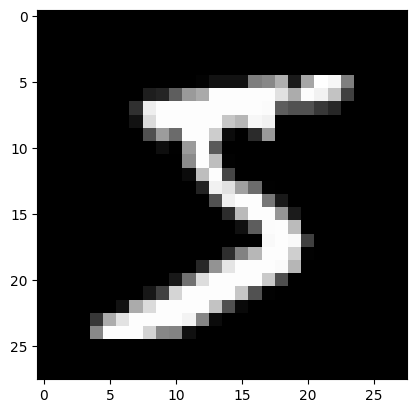

In [178]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


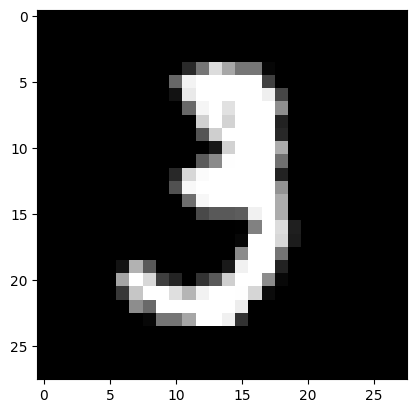

In [179]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

It's evident that these images are relatively small in size, and recognizing the digits can sometimes be challenging even for the human eye. While it's useful to look at these images, there's just one problem here: PyTorch doesn't know how to work with images. We need to convert the images into tensors. We can do this by specifying a transform while creating our dataset.

In [180]:
import torchvision.transforms as transforms

PyTorch datasets allow us to specify one or more transformation functions that are applied to the images as they are loaded. The `torchvision.transforms` module contains many such predefined functions. We'll use the `ToTensor` transform to convert images into PyTorch tensors.

In [181]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


The image is now converted to a 1x28x28 tensor. The first dimension tracks color channels. The second and third dimensions represent pixels along the height and width of the image, respectively. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in which case there are three channels: red, green, and blue (RGB). 

Let's look at some sample values inside the tensor.

In [182]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


The values range from 0 to 1, with `0` representing black, `1` white, and the values in between different shades of grey. We can also plot the tensor as an image using `plt.imshow`.

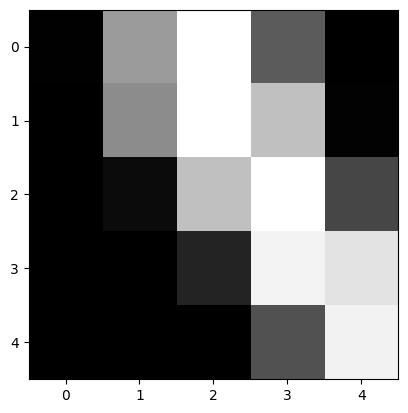

In [183]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

Note that we need to pass just the 28x28 matrix to `plt.imshow`, without a channel dimension. We also pass a color map (`cmap=gray`) to indicate that we want to see a grayscale image.

#### 2.1(b) Training and Validation Datasets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using gradient descent.
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc.), and pick the best version of the model.
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.

In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images. 

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the `random_spilt` method from PyTorch.

In [184]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

It's essential to choose a random sample for creating a validation set. Training data is often sorted by the target labels, i.e., images of 0s, followed by 1s, followed by 2s, etc. If we create a validation set using the last 20% of images, it would only consist of 8s and 9s. In contrast, the training set would contain no 8s or 9s. Such a training-validation would make it impossible to train a useful model.

We can now create data loaders to help us load the data in batches. We'll use a batch size of 128.

In [185]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

We set `shuffle=True` for the training data loader to ensure that the batches generated in each epoch are different. This randomization helps generalize & speed up the training process. On the other hand, since the validation data loader is used only for evaluating the model, there is no need to shuffle the images. 

### 2.2 `Logistic Regression, Softmax & Cross-Entropy`

#### 2.2(a) Model

Now that we have prepared our data loaders, we can define our model.

* A **logistic regression** model is almost identical to a linear regression model. It contains weights and bias matrices, and the output is obtained using simple matrix operations (`pred = x @ w.t() + b`). 

* As we did with linear regression, we can use `nn.Linear` to create the model instead of manually creating and initializing the matrices.

* Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor is _flattened_ into a vector of size 784 `(28*28)` before being passed into the model. 

* The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [186]:
# Because we have already imported this
#import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

Of course, this model is a lot larger than our previous model in terms of the number of parameters. Let's take a look at the weights and biases.

In [187]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0018,  0.0316,  0.0067,  ..., -0.0294, -0.0173,  0.0303],
        [ 0.0331,  0.0077,  0.0011,  ...,  0.0060, -0.0160,  0.0340],
        [-0.0066,  0.0010,  0.0309,  ..., -0.0325,  0.0318,  0.0210],
        ...,
        [-0.0248,  0.0290, -0.0009,  ..., -0.0034, -0.0088,  0.0149],
        [ 0.0293,  0.0314, -0.0322,  ...,  0.0239,  0.0176, -0.0041],
        [-0.0014,  0.0248, -0.0152,  ...,  0.0192,  0.0153,  0.0012]],
       requires_grad=True)

In [188]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0174,  0.0354, -0.0085,  0.0032, -0.0084, -0.0242,  0.0272,  0.0205,
        -0.0058, -0.0194], requires_grad=True)

Although there are a total of 7850 parameters here, conceptually, nothing has changed so far. Let's try and generate some outputs using our model. We'll take the first batch of 100 images from our dataset and pass them into our model.

In [189]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([5, 6, 4, 8, 1, 0, 9, 0, 1, 1, 8, 1, 8, 1, 2, 8, 9, 6, 2, 9, 9, 7, 7, 3,
        0, 2, 2, 2, 2, 7, 5, 4, 7, 1, 5, 0, 1, 9, 6, 4, 5, 3, 9, 2, 1, 8, 6, 2,
        9, 5, 6, 6, 7, 7, 6, 1, 5, 4, 7, 1, 3, 3, 0, 4, 1, 5, 8, 9, 3, 2, 0, 6,
        0, 0, 9, 4, 3, 3, 4, 0, 5, 7, 3, 4, 7, 1, 5, 2, 9, 9, 0, 5, 0, 9, 2, 5,
        6, 4, 2, 7, 0, 9, 0, 7, 7, 0, 6, 9, 8, 5, 5, 1, 9, 6, 8, 1, 7, 6, 4, 4,
        0, 1, 7, 8, 9, 2, 6, 2])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [190]:
images.shape

torch.Size([128, 1, 28, 28])

In [191]:
images.reshape(128, 784).shape

torch.Size([128, 784])

The code above leads to an error because our input data does not have the right shape. Our images are of the shape 1x28x28, but we need them to be vectors of size 784, i.e., we need to flatten them. We'll use the `.reshape` method of a tensor, which will allow us to efficiently 'view' each image as a flat vector without really creating a copy of the underlying data. To include this additional functionality within our model, we need to define a custom model by extending the `nn.Module` class from PyTorch. 

A class in Python provides a "blueprint" for creating objects. Let's look at an example of defining a new class in Python.

In [192]:
class Person:
    # Class constructor
    def __init__(self, name, age):
        # Object properties
        self.name = name
        self.age = age
    
    # Method
    def say_hello(self):
        print("Hello my name is " + self.name + "!")

In [193]:
# Here's how we create or _instantiate_ an object of the class `Person`.

bob = Person("Bob", 32)

The object `bob` is an instance of the class `Person`. 

We can access the object's properties (also called attributes) or invoke its methods using the `.` notation.

In [194]:
bob.name, bob.age

('Bob', 32)

In [195]:
bob.say_hello()

Hello my name is Bob!


You can learn more about Python classes here: https://www.w3schools.com/python/python_classes.asp .

Classes can also build upon or _extend_ the functionality of existing classes. Let's extend the `nn.Module` class from PyTorch to define a custom model.

In [196]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`. And inside the `forward` method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into `self.linear`.

`xb.reshape(-1, 28*28)` indicates to PyTorch that we want a *view* of the `xb` tensor with two dimensions. The length along the 2nd dimension is 28\*28 (i.e., 784). One argument to `.reshape` can be set to `-1` (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has `.weight` and `.bias` attributes (as they are now inside the `.linear` attribute), but it does have a `.parameters` method that returns a list containing the weights and bias.

In [197]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [198]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0210,  0.0239,  0.0180,  ..., -0.0330, -0.0087,  0.0073],
         [-0.0091, -0.0088,  0.0217,  ...,  0.0111,  0.0185,  0.0038],
         [-0.0345,  0.0208,  0.0252,  ..., -0.0283,  0.0118, -0.0303],
         ...,
         [ 0.0311,  0.0266,  0.0304,  ..., -0.0301,  0.0066, -0.0301],
         [-0.0098, -0.0012,  0.0207,  ..., -0.0006,  0.0127, -0.0217],
         [ 0.0253, -0.0241,  0.0010,  ..., -0.0322,  0.0338,  0.0138]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0144,  0.0187,  0.0042, -0.0083, -0.0250,  0.0145, -0.0274,  0.0091,
          0.0204,  0.0022], requires_grad=True)]

We can use our new custom model in the same way as before. Let's see if it works.

In [199]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.2205, -0.0068, -0.1545, -0.0531,  0.2479, -0.1993, -0.1341, -0.2726,
         -0.0776, -0.0171],
        [-0.1650, -0.1401, -0.4977,  0.1119,  0.1864, -0.1428, -0.2244, -0.1139,
         -0.1724, -0.1781]])


#### 2.2(b) Softmax Function

For each of the 100 input images, we get 10 outputs, one for each class. As discussed earlier, we'd like these outputs to represent probabilities. Each output row's elements must lie between 0 to 1 and add up to 1, which is not the case. 

To convert the output rows into probabilities, we use the softmax function, which has the following formula:

![softmax](https://i.imgur.com/EAh9jLN.png)

First, we replace each element `yi` in an output row by `e^yi`, making all the elements positive. 

![](https://www.montereyinstitute.org/courses/DevelopmentalMath/COURSE_TEXT2_RESOURCE/U18_L1_T1_text_final_6_files/image001.png)



Then, we divide them by their sum to ensure that they add up to 1. The resulting vector can thus be interpreted as probabilities.

While it's easy to implement the softmax function (you should try it!), we'll use the implementation that's provided within PyTorch because it works well with multidimensional tensors (a list of output rows in our case).

In [200]:
# We have already imported this
# import torch.nn.functional as F

In [201]:
outputs[:2]

tensor([[ 0.2205, -0.0068, -0.1545, -0.0531,  0.2479, -0.1993, -0.1341, -0.2726,
         -0.0776, -0.0171],
        [-0.1650, -0.1401, -0.4977,  0.1119,  0.1864, -0.1428, -0.2244, -0.1139,
         -0.1724, -0.1781]], grad_fn=<SliceBackward0>)

In [202]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1287, 0.1025, 0.0884, 0.0979, 0.1322, 0.0846, 0.0902, 0.0786, 0.0955,
         0.1014],
        [0.0954, 0.0978, 0.0684, 0.1259, 0.1356, 0.0976, 0.0899, 0.1004, 0.0947,
         0.0942]])
Sum:  1.0000001192092896


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using `torch.max`, which returns each row's largest element and the corresponding index.

In [203]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 4, 4, 3, 2, 6, 3, 3, 4, 3, 3, 9, 3, 1, 3, 1, 4, 4, 4, 4, 9, 5, 3, 9,
        6, 4, 1, 4, 3, 8, 3, 4, 2, 3, 2, 3, 3, 4, 4, 6, 3, 2, 4, 3, 4, 3, 1, 4,
        4, 9, 3, 3, 3, 3, 4, 9, 3, 3, 3, 4, 3, 3, 3, 4, 4, 2, 6, 4, 3, 3, 3, 3,
        2, 1, 4, 1, 7, 3, 2, 6, 3, 3, 3, 3, 6, 3, 1, 3, 3, 1, 3, 3, 4, 7, 3, 3,
        3, 2, 4, 1, 4, 1, 4, 3, 3, 3, 3, 4, 3, 3, 4, 5, 7, 0, 9, 1, 3, 3, 6, 3,
        1, 6, 4, 5, 1, 5, 7, 4])
tensor([0.1322, 0.1356, 0.1223, 0.1558, 0.1530, 0.1179, 0.1485, 0.1261, 0.1571,
        0.1456, 0.1367, 0.1253, 0.1162, 0.1249, 0.1168, 0.1223, 0.1336, 0.1604,
        0.1219, 0.1230, 0.1289, 0.1095, 0.1403, 0.1267, 0.1425, 0.1166, 0.1332,
        0.1192, 0.1252, 0.1122, 0.1330, 0.1549, 0.1348, 0.1441, 0.1362, 0.1312,
        0.1174, 0.1294, 0.1311, 0.1239, 0.1580, 0.1245, 0.1304, 0.1637, 0.1136,
        0.1311, 0.1192, 0.1508, 0.1317, 0.1254, 0.1242, 0.1189, 0.1450, 0.1178,
        0.1247, 0.1268, 0.1245, 0.1310, 0.1168, 0.1321, 0.1630, 0.1258, 0.1198,
       

The numbers printed above are the predicted labels for the first batch of training images. Let's compare them with the actual labels.

In [204]:
labels

tensor([4, 9, 2, 3, 2, 4, 2, 9, 2, 7, 0, 5, 6, 8, 3, 2, 4, 0, 2, 4, 3, 2, 8, 3,
        5, 4, 9, 3, 4, 1, 8, 3, 3, 0, 2, 3, 1, 6, 6, 2, 3, 2, 3, 0, 4, 2, 8, 6,
        6, 5, 4, 1, 3, 7, 4, 4, 3, 8, 2, 4, 3, 5, 4, 6, 2, 2, 6, 5, 7, 7, 5, 9,
        2, 6, 0, 8, 5, 7, 2, 2, 2, 2, 1, 5, 9, 2, 2, 2, 2, 2, 8, 0, 9, 6, 1, 2,
        0, 2, 6, 1, 4, 8, 7, 7, 7, 1, 7, 7, 2, 2, 6, 5, 5, 2, 9, 3, 8, 7, 1, 3,
        4, 0, 5, 6, 4, 4, 1, 6])

Most of the predicted labels are different from the actual labels. That's because we have started with randomly initialized weights and biases. We need to train the model, i.e., adjust the weights using gradient descent to make better predictions.

#### 2.2(c) Evaluation Metric and Loss Function

Just as with linear regression, we need a way to evaluate how well our model is performing. A natural way to do this would be to find the percentage of labels that were predicted correctly, i.e,. the **accuracy** of the predictions. 

In [205]:
outputs[:2]

tensor([[ 0.2205, -0.0068, -0.1545, -0.0531,  0.2479, -0.1993, -0.1341, -0.2726,
         -0.0776, -0.0171],
        [-0.1650, -0.1401, -0.4977,  0.1119,  0.1864, -0.1428, -0.2244, -0.1139,
         -0.1724, -0.1781]], grad_fn=<SliceBackward0>)

In [206]:
torch.sum(preds == labels)

tensor(27)

In [207]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

The `==` operator performs an element-wise comparison of two tensors with the same shape and returns a tensor of the same shape, containing `True` for unequal elements and `False` for equal elements. Passing the result to `torch.sum` returns the number of labels that were predicted correctly. Finally, we divide by the total number of images to get the accuracy. 

Note that we don't need to apply softmax to the outputs since its results have the same relative order. This is because `e^x` is an increasing function, i.e., if `y1 > y2`, then `e^y1 > e^y2`. The same holds after averaging out the values to get the softmax.

Let's calculate the accuracy of the current model on the first batch of data. 

In [208]:
accuracy(outputs, labels)

tensor(0.2109)

In [209]:
probs

tensor([[0.1287, 0.1025, 0.0884,  ..., 0.0786, 0.0955, 0.1014],
        [0.0954, 0.0978, 0.0684,  ..., 0.1004, 0.0947, 0.0942],
        [0.1022, 0.1122, 0.0728,  ..., 0.0850, 0.0974, 0.1212],
        ...,
        [0.1167, 0.0936, 0.1055,  ..., 0.0803, 0.0847, 0.0773],
        [0.0875, 0.1131, 0.0953,  ..., 0.1131, 0.1027, 0.1000],
        [0.1069, 0.1146, 0.1027,  ..., 0.0726, 0.0768, 0.1015]],
       grad_fn=<SoftmaxBackward0>)

#### 2.2(d) Cross-Entropy

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:

1. It's not a differentiable function. `torch.max` and `==` are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements. 

For these reasons, accuracy is often used as an **evaluation metric** for classification, but not as a loss function. A commonly used loss function for classification problems is the **cross-entropy**, which has the following formula:

![cross-entropy](https://i.imgur.com/VDRDl1D.png)

While it looks complicated, it's actually quite simple:

* For each output row, pick the predicted probability for the correct label. E.g., if the predicted probabilities for an image are `[0.1, 0.3, 0.2, ...]` and the correct label is `1`, we pick the corresponding element `0.3` and ignore the rest.

* Then, take the [logarithm](https://en.wikipedia.org/wiki/Logarithm) of the picked probability. If the probability is high, i.e., close to 1, then its logarithm is a very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

![](https://www.intmath.com/blog/wp-content/images/2019/05/log10.png)

* Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function.

As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross-entropy as part of the `torch.nn.functional` package. Moreover, it also performs softmax internally, so we can directly pass in the model's outputs without converting them into probabilities.

In [210]:
outputs

tensor([[ 0.2205, -0.0068, -0.1545,  ..., -0.2726, -0.0776, -0.0171],
        [-0.1650, -0.1401, -0.4977,  ..., -0.1139, -0.1724, -0.1781],
        [-0.1432, -0.0493, -0.4826,  ..., -0.3267, -0.1909,  0.0279],
        ...,
        [-0.0313, -0.2516, -0.1326,  ..., -0.4054, -0.3514, -0.4437],
        [-0.1673,  0.0886, -0.0827,  ...,  0.0889, -0.0075, -0.0343],
        [-0.0792, -0.0093, -0.1196,  ..., -0.4661, -0.4098, -0.1309]],
       grad_fn=<AddmmBackward0>)

In [211]:
loss_fn = F.cross_entropy

In [212]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2538, grad_fn=<NllLossBackward0>)


We know that cross-entropy is the negative logarithm of the predicted probability of the correct label averaged over all training samples. Therefore, one way to interpret the resulting number e.g. `2.23` is look at `e^-2.23` which is around `0.1` as the predicted probability of the correct label, on average. *The lower the loss, The better the model.*

### 2.3 `Model Training, Evaluation & Sample Predictions`

#### 2.3(a) Training the model

Now that we have defined the data loaders, model, loss function and optimizer, we are ready to train the model. The training process is identical to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Here's what it looks like in pseudocode:

```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```

Some parts of the training loop are specific the specific problem we're solving (e.g. loss function, metrics etc.) whereas others are generic and can be applied to any deep learning problem. 

We'll include the problem-independent parts within a function called `fit`, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the `nn.Module` class.


In [213]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

The `fit` function records the validation loss and metric from each epoch. It returns a history of the training, useful for debugging & visualization.

Configurations like batch size, learning rate, etc. (called hyperparameters), need to picked in advance while training machine learning models. Choosing the right hyperparameters is critical for training a reasonably accurate model within a reasonable amount of time. It is an active area of research and experimentation in machine learning. Feel free to try different learning rates and see how it affects the training process.


Let's define the `evaluate` function, used in the validation phase of `fit`.

In [214]:
l1 = [1, 2, 3, 4, 5]
l2 = [x*2 for x in l1]
l2

[2, 4, 6, 8, 10]

In [215]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


Finally, let's redefine the `MnistModel` class to include additional methods `training_step`, `validation_step`, `validation_epoch_end`, and `epoch_end` used by `fit` and `evaluate`.

In [216]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

#### 2.3(b) Validating the model

Before we test the model, let's see how the model performs on the validation set with the initial set of randomly initialized weights & biases.


In [217]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3120622634887695, 'val_acc': 0.09335443377494812}

The initial accuracy is around 10%, which one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

We are now ready to train the model. Let's train for five epochs and look at the results.

In [218]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9419, val_acc: 0.6311
Epoch [1], val_loss: 1.6734, val_acc: 0.7369
Epoch [2], val_loss: 1.4729, val_acc: 0.7728
Epoch [3], val_loss: 1.3212, val_acc: 0.7934
Epoch [4], val_loss: 1.2043, val_acc: 0.8059


That's a great result! With just 5 epochs of training, our model has reached an accuracy of over 80% on the validation set. Let's see if we can improve that by training for a few more epochs. Try changing the learning rates and number of epochs in each of the cells below.

In [219]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1123, val_acc: 0.8146
Epoch [1], val_loss: 1.0384, val_acc: 0.8222
Epoch [2], val_loss: 0.9779, val_acc: 0.8261
Epoch [3], val_loss: 0.9275, val_acc: 0.8318
Epoch [4], val_loss: 0.8849, val_acc: 0.8362


In [220]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8484, val_acc: 0.8394
Epoch [1], val_loss: 0.8168, val_acc: 0.8419
Epoch [2], val_loss: 0.7892, val_acc: 0.8439
Epoch [3], val_loss: 0.7648, val_acc: 0.8467
Epoch [4], val_loss: 0.7430, val_acc: 0.8483


In [221]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7235, val_acc: 0.8501
Epoch [1], val_loss: 0.7060, val_acc: 0.8526
Epoch [2], val_loss: 0.6900, val_acc: 0.8533
Epoch [3], val_loss: 0.6755, val_acc: 0.8548
Epoch [4], val_loss: 0.6622, val_acc: 0.8568


While the accuracy does continue to increase as we train for more epochs, the improvements get smaller with every epoch. Let's visualize this using a line graph.

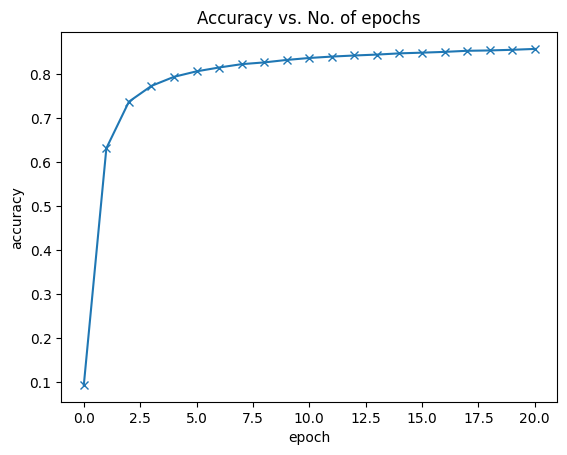

In [222]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

It's quite clear from the above picture that the model probably won't cross the accuracy threshold of 90% even after training for a very long time. One possible reason for this is that the learning rate might be too high. The model's parameters may be "bouncing" around the optimal set of parameters for the lowest loss. You can try reducing the learning rate and training for a few more epochs to see if it helps.

The more likely reason that **the model just isn't powerful enough**. If you remember our initial hypothesis, we have assumed that the output (in this case the class probabilities) is a **linear function** of the input (pixel intensities), obtained by perfoming a matrix multiplication with the weights matrix and adding the bias. This is a fairly weak assumption, as there may not actually exist a linear relationship between the pixel intensities in an image and the digit it represents. While it works reasonably well for a simple dataset like MNIST (getting us to 85% accuracy), we need more sophisticated models that can capture non-linear relationships between image pixels and labels for complex tasks like recognizing everyday objects, animals etc. 

#### 2.3(c) Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the `ToTensor` transform.

In [223]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Here's a sample image from the dataset.

Shape: torch.Size([1, 28, 28])
Label: 7


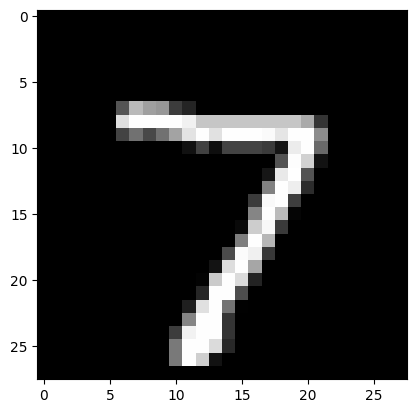

In [224]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [225]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

#### 2.3(d) Sample Predictions

`img.unsqueeze` simply adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, which the model views as a batch containing a single image.

Let's try it out with a few images.

Label: 7 , Predicted: 7


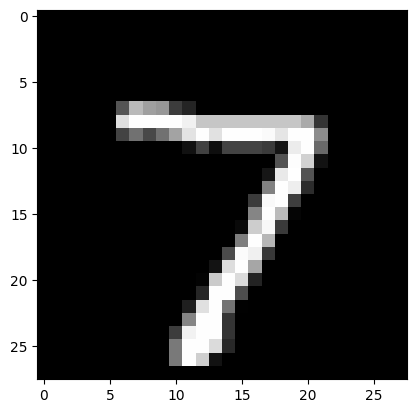

In [226]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


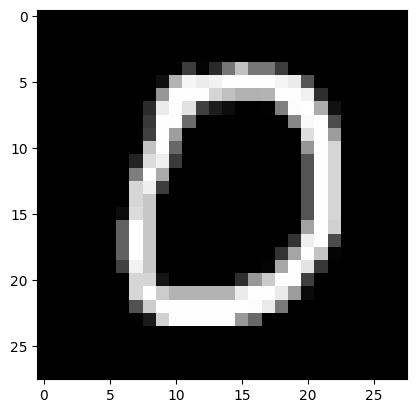

In [227]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 3


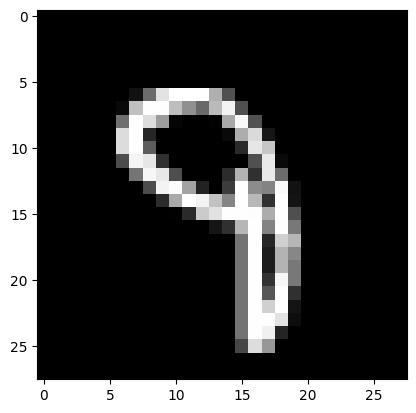

In [228]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


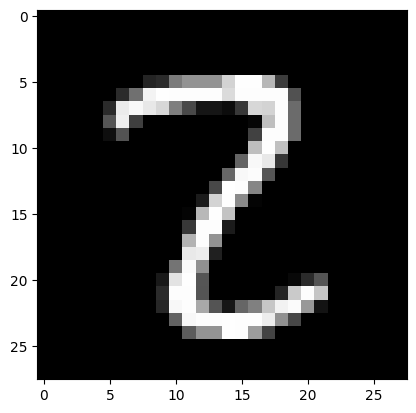

In [229]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [230]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.641971230506897, 'val_acc': 0.85888671875}

We expect this to be similar to the accuracy/loss on the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

#### 2.3(e) Saving and loading the model

Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights and bias matrices to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.

In [231]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model.

In [232]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0317,  0.0232,  0.0235,  ..., -0.0046, -0.0002,  0.0120],
                      [-0.0304,  0.0027,  0.0310,  ...,  0.0007,  0.0346, -0.0256],
                      [ 0.0172,  0.0111,  0.0187,  ..., -0.0112,  0.0051, -0.0206],
                      ...,
                      [ 0.0176, -0.0288,  0.0163,  ..., -0.0202, -0.0238, -0.0200],
                      [-0.0355, -0.0001,  0.0171,  ...,  0.0228, -0.0305,  0.0120],
                      [-0.0315,  0.0195, -0.0331,  ..., -0.0243,  0.0055, -0.0020]])),
             ('linear.bias',
              tensor([-0.0644,  0.1104, -0.0212,  0.0074,  0.0060,  0.0561, -0.0028,  0.0156,
                      -0.0960, -0.0201]))])

To load the model weights, we can instante a new object of the class `MnistModel`, and use the `.load_state_dict` method.

In [233]:
model2 = MnistModel()
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0329, -0.0338, -0.0017,  ..., -0.0110,  0.0094,  0.0058],
                      [-0.0240, -0.0220, -0.0158,  ...,  0.0266, -0.0247, -0.0042],
                      [-0.0230, -0.0194, -0.0063,  ...,  0.0070, -0.0011,  0.0193],
                      ...,
                      [ 0.0275,  0.0312, -0.0087,  ...,  0.0133, -0.0118,  0.0101],
                      [ 0.0028,  0.0145, -0.0131,  ..., -0.0123,  0.0228,  0.0251],
                      [ 0.0326,  0.0098, -0.0266,  ...,  0.0040, -0.0254, -0.0055]])),
             ('linear.bias',
              tensor([-0.0184,  0.0134, -0.0266, -0.0217,  0.0252,  0.0338,  0.0306, -0.0278,
                      -0.0029, -0.0257]))])

In [234]:
evaluate(model2, test_loader)

{'val_loss': 2.337465286254883, 'val_acc': 0.07148437201976776}

In [235]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0317,  0.0232,  0.0235,  ..., -0.0046, -0.0002,  0.0120],
                      [-0.0304,  0.0027,  0.0310,  ...,  0.0007,  0.0346, -0.0256],
                      [ 0.0172,  0.0111,  0.0187,  ..., -0.0112,  0.0051, -0.0206],
                      ...,
                      [ 0.0176, -0.0288,  0.0163,  ..., -0.0202, -0.0238, -0.0200],
                      [-0.0355, -0.0001,  0.0171,  ...,  0.0228, -0.0305,  0.0120],
                      [-0.0315,  0.0195, -0.0331,  ..., -0.0243,  0.0055, -0.0020]])),
             ('linear.bias',
              tensor([-0.0644,  0.1104, -0.0212,  0.0074,  0.0060,  0.0561, -0.0028,  0.0156,
                      -0.0960, -0.0201]))])

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before.

In [236]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.641971230506897, 'val_acc': 0.85888671875}

### *`Exercises`*

Try out the following exercises to apply the concepts and techniques you have learned so far:

* Coding exercises on end-to-end model training: https://jovian.ai/aakashns/02-insurance-linear-regression
* Starter notebook for logistic regression projects: https://jovian.ai/aakashns/mnist-logistic-minimal
* Starter notebook for linear regression projects: https://jovian.ai/aakashns/housing-linear-minimal

Training great machine learning models within a short time takes practice and experience. Try experimenting with different datasets, models and hyperparameters, it's the best way to acquire this skill.

### *`Summary and Further Reading`*

We've created a fairly sophisticated training and evaluation pipeline in this tutorial. Here's a list of the topics we've covered:

* Working with images in PyTorch (using the MNIST dataset)
* Splitting a dataset into training, validation and test sets
* Creating PyTorch models with custom logic by extending the `nn.Module` class
* Interpreting model ouputs as probabilities using softmax, and picking predicted labels
* Picking a good evaluation metric (accuracy) and loss function (cross entropy) for classification problems
* Setting up a training loop that also evaluates the model using the validation set
* Testing the model manually on randomly picked examples 
* Saving and loading model checkpoints to avoid retraining from scratch

There's a lot of scope to experiment here, and I encourage you to use the interactive nature of Jupyter to play around with the various parameters. Here are a few ideas:

* Try making the validation set smaller or larger, and see how it affects the model.
* Try changing the learning rate and see if you can achieve the same accuracy in fewer epochs.
* Try changing the batch size. What happens if you use too high a batch size, or too low?
* Modify the `fit` function to also track the overall loss and accuracy on the training set, and see how it compares with the validation loss/accuracy. Can you explain why it's lower/higher?
* Train with a small subset of the data, and see if you can reach a similar level of accuracy.
* Try building a model for a different dataset, such as the [CIFAR10 or CIFAR100 datasets](https://www.cs.toronto.edu/~kriz/cifar.html).

Here are some references for further reading:
* For a more mathematical treatment, see the popular [Machine Learning](https://www.coursera.org/lecture/machine-learning/classification-wlPeP) course on Coursera. Most of the images used in this tutorial series have been taken from this course.
* The training loop defined in this notebook was inspired from [FastAI development notebooks](https://github.com/fastai/fastai_docs/blob/master/dev_nb/001a_nn_basics.ipynb) which contain a wealth of other useful stuff if you can read and understand the code.
* For a deep dive into softmax and cross entropy, see [this blog post on DeepNotes](https://deepnotes.io/softmax-crossentropy).


With this we complete our discussion of logistic regression, and we're ready to move on to the next topic: [Training Deep Neural Networks on a GPU](https://jovian.ai/aakashns/04-feedforward-nn)!

## Lesson 3: `Training Deep Neural Networks on a GPU`

**Topics covered in this lesson:** <br/>

### 3.1 Activation Functions, Non-Linearity & Backprop
### 3.2 Training Models faster using Cloud GPUs
### 3.3 Experimenting with Hyperparameters to Improve the Model

### 3.1 `Activation Functions, Non-Linearity & Backprop`

#### 3.1(a) Preparing the Dataset

We have already done this in the above segment so below lines of codes doesn't need to be executed again!!<br/>
**`Codes:`**<br/>

* dataset = MNIST(root='data/', download=True, transform=ToTensor())
* Let's look at a couple of images from the dataset. The images are converted to PyTorch tensors with the shape `1x28x28` (the dimensions represent color channels, width and height). We can use `plt.imshow` to display the images. However, `plt.imshow` expects channels to be last dimension in an image tensor, so we use the `permute` method to reorder the dimensions of the image.<br/>

    image, label = dataset[0]<br/>
    print('image.shape:', image.shape)<br/>
    plt.imshow(image.permute(1, 2, 0), cmap='gray')<br/>
    print('Label:', label)<br/>


#### 3.1(b) Using `random_split` helper Function

image.shape: torch.Size([1, 28, 28])
Label: 7


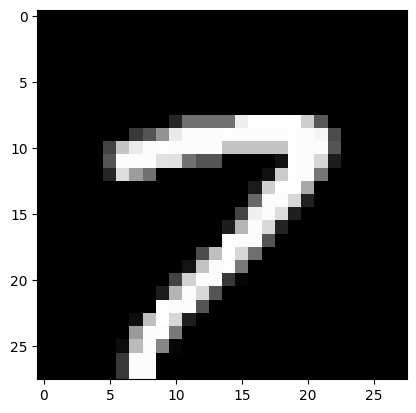

In [241]:
image, label = dataset[123]
print('image.shape:', image.shape)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
print('Label:', label)

Next, let's use the `random_split` helper function to set aside 10000 images for our validation set.

In [242]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

We can now create PyTorch data loaders for training and validation.

In [243]:
batch_size=128

train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

To figure out the purpose of the arguments `num_workers` and `pin_memory`? Try looking into the documentation: https://pytorch.org/docs/stable/data.html .

Let's visualize a batch of data in a grid using the `make_grid` function from `torchvision`. We'll also use the `.permute` method on the tensor to move the channels to the last dimension, as expected by `matplotlib`.

images.shape: torch.Size([128, 1, 28, 28])


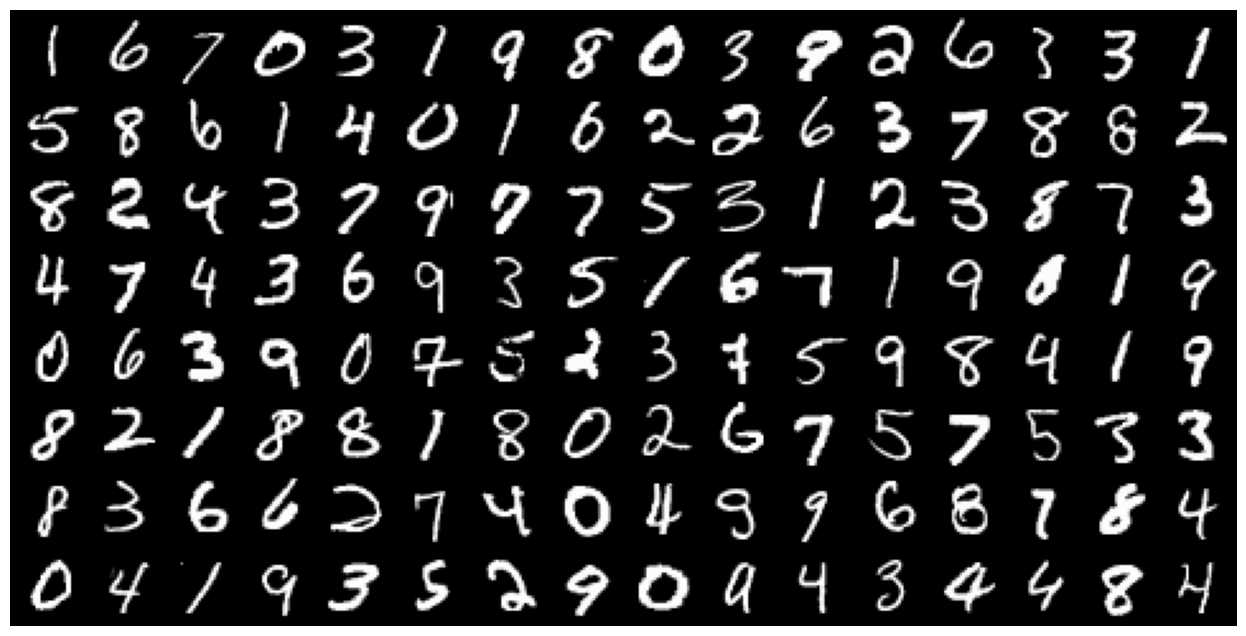

In [244]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

#### 3.1(c) Hidden Layers, Activation Functions and Non-Linearity

We'll create a neural network with two layers: a _hidden layer_ and an _output layer_. Additionally, we'll use an _activation function_ between the two layers. Let's look at a step-by-step example to learn how hidden layers and activation functions can help capture non-linear relationships between inputs and outputs.

First, let's create a batch of inputs tensors. We'll flatten the `1x28x28` images into vectors of size `784`, so they can be passed into an `nn.Linear` object.

In [245]:
for images, labels in train_loader:
    print('images.shape:', images.shape)
    inputs = images.reshape(-1, 784)
    print('inputs.shape:', inputs.shape)
    break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


Next, let's create a `nn.Linear` object, which will serve as our _hidden_ layer. We'll set the size of the output from the hidden layer to 32. This number can be increased or decreased to change the _learning capacity_ of the model.

In [246]:
input_size = inputs.shape[-1]
hidden_size = 32

In [247]:
layer1 = nn.Linear(input_size, hidden_size)

We can now compute intermediate outputs for the batch of images by passing `inputs` through `layer1`.

In [248]:
inputs.shape

torch.Size([128, 784])

In [249]:
layer1_outputs = layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


The image vectors of size `784` are transformed into intermediate output vectors of length `32` by performing a matrix multiplication of `inputs` matrix with the transposed weights matrix of `layer1` and adding the bias. We can verify this using `torch.allclose`. For a more detailed explanation, review the tutorial on [linear regression](https://jovian.ai/aakashns/02-linear-regression).

In [250]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [251]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

Thus, `layer1_outputs` and `inputs` have a linear relationship, i.e., each element of `layer_outputs` is a weighted sum of elements from `inputs`. Thus, even as we train the model and modify the weights, `layer1` can only capture linear relationships between `inputs` and `outputs`.

<img src="https://i.imgur.com/inXsLuq.png" width="360">

Next, we'll use the Rectified Linear Unit (ReLU) function as the activation function for the outputs. It has the formula `relu(x) = max(0,x)` i.e. it simply replaces negative values in a given tensor with the value 0. ReLU is a non-linear function, as seen here visually:

<img src="https://i.imgur.com/yijV4xF.png" width="420">

We can use the `F.relu` method to apply ReLU to the elements of a tensor.

In [252]:
F.relu(torch.tensor([[1, -1, 0], 
                     [-0.1, .2, 3]]))

tensor([[1.0000, 0.0000, 0.0000],
        [0.0000, 0.2000, 3.0000]])

Let's apply the activation function to `layer1_outputs` and verify that negative values were replaced with 0.

In [253]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())

min(layer1_outputs): -0.7234806418418884
min(relu_outputs): 0.0


Now that we've applied a non-linear activation function, `relu_outputs` and `inputs` do not have a linear relationship. We refer to `ReLU` as the _activation function_, because for each input certain outputs are activated (those with non-zero values) while others turned off (those with zero values)

Next, let's create an output layer to convert vectors of length `hidden_size` in `relu_outputs` into vectors of length 10, which is the desired output of our model (since there are 10 target labels).

In [254]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [259]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [260]:
inputs.shape

torch.Size([128, 784])

As expected, `layer2_outputs` contains a batch of vectors of size 10. We can now use this output to compute the loss using `F.cross_entropy` and adjust the weights of `layer1` and `layer2` using gradient descent.

In [261]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3154, grad_fn=<NllLossBackward0>)

Thus, our model transforms `inputs` into `layer2_outputs` by applying a linear transformation (using `layer1`), followed by a non-linear activation (using `F.relu`), followed by another linear transformation (using `layer2`). Let's verify this by re-computing the output using basic matrix operations.

In [262]:
# Expanded version of layer2(F.relu(layer1(inputs)))
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias

In [263]:
torch.allclose(outputs, layer2_outputs, 1e-3)

True

Note that `outputs` and `inputs` do not have a linear relationship due to the non-linear activation function `F.relu`. As we train the model and adjust the weights of `layer1` and `layer2`, we can now capture non-linear relationships between the images and their labels. In other words, introducing non-linearity makes the model more powerful and versatile. Also, since `hidden_size` does not depend on the dimensions of the inputs or outputs, we vary it to increase the number of parameters within the model. We can also introduce new hidden layers and apply the same non-linear activation after each hidden layer.

The model we just created is called a neural network. A _deep neural network_ is simply a neural network with one or more hidden layers. In fact, the [Universal Approximation Theorem](http://neuralnetworksanddeeplearning.com/chap4.html) states that a sufficiently large & deep neural network can compute any arbitrary function i.e. it can _learn_ rich and complex non-linear relationships between inputs and targets. Here are some examples:

* Identifying if an image contains a cat or a dog (or [something else](https://machinelearningmastery.com/introduction-to-the-imagenet-large-scale-visual-recognition-challenge-ilsvrc/))
* Identifying the genre of a song using a 10-second sample
* Classifying movie reviews as positive or negative based on their content
* Navigating self-driving cars using a video feed of the road
* Translating sentences from English to French (and hundreds of other languages)
* Converting a speech recording to text and vice versa
* And many more...

It's hard to imagine how the simple process of multiplying inputs with randomly initialized matrices, applying non-linear activations, and adjusting weights repeatedly using gradient descent can yield such astounding results. Deep learning models often contain millions of parameters, which can together capture far more complex relationships than the human brain can comprehend.

If we hadn't included a non-linear activation between the two linear layers, the final relationship between inputs and outputs would still be linear. A simple refactoring of the computations illustrates this.

In [264]:
# Same as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

In [265]:
# Create a single layer to replace the two linear layers
combined_layer = nn.Linear(input_size, output_size)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [266]:
# Same as combined_layer(inputs)
outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias

In [267]:
torch.allclose(outputs2, outputs3, 1e-3)

True

#### 3.1(d) Model

We are now ready to define our model. As discussed above, we'll create a neural network with one hidden layer. Here's what that means:

* Instead of using a single `nn.Linear` object to transform a batch of inputs (pixel intensities) into outputs (class probabilities), we'll use two `nn.Linear` objects. Each of these is called a _layer_ in the network. 

* The first layer (also known as the hidden layer) will transform the input matrix of shape `batch_size x 784` into an intermediate output matrix of shape `batch_size x hidden_size`. The parameter `hidden_size` can be configured manually (e.g., 32 or 64).

* We'll then apply a non-linear *activation function* to the intermediate outputs. The activation function transforms individual elements of the matrix.

* The result of the activation function, which is also of size `batch_size x hidden_size`, is passed into the second layer (also known as the output layer).  The second layer transforms it into a matrix of size `batch_size x 10`. We can use this output to compute the loss and adjust weights using gradient descent.


As discussed above, our model will contain one hidden layer. Here's what it looks like visually:

<img src="https://i.imgur.com/eN7FrpF.png" width="480">


Let's define the model by extending the `nn.Module` class from PyTorch.

In [268]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

We also need to define an `accuracy` function which calculates the accuracy of the model's prediction on an batch of inputs. It's used in `validation_step` above.

In [269]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

We'll create a model that contains a hidden layer with 32 activations.

In [270]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

In [271]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)

Let's take a look at the model's parameters. We expect to see one weight and bias matrix for each of the layers.

In [272]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


Let's try and generate some outputs using our model. We'll take the first batch of 128 images from our dataset and pass them into our model.

In [273]:
for images, labels in train_loader:
    outputs = model(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 2.312328338623047
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.1418, -0.0651,  0.1421, -0.0294,  0.1627,  0.0413, -0.0225, -0.0386,
          0.1045, -0.1600],
        [-0.1332, -0.1615,  0.1009, -0.0349,  0.1051,  0.0755, -0.1181,  0.0028,
          0.0752, -0.2103]])


### 3.2 `Training Models faster using Cloud GPUs`(Local GPU in my Case)

#### 3.2(a) Checking for all the Available Devices and Versions

As the sizes of our models and datasets increase, we need to use GPUs to train our models within a reasonable amount of time. GPUs contain hundreds of cores optimized for performing expensive matrix operations on floating-point numbers quickly, making them ideal for training deep neural networks. You can use GPUs for free on [Google Colab](https://colab.research.google.com/) and [Kaggle](https://www.kaggle.com/kernels) or rent GPU-powered machines on services like [Google Cloud Platform](https://cloud.google.com/gpu/), [Amazon Web Services](https://docs.aws.amazon.com/dlami/latest/devguide/gpu.html), and [Paperspace](https://www.paperspace.com/).


Checking the Versions of all the drivers installed/present

In [237]:
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION:', )
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())
print ('Available devices: ', torch.cuda.device_count())
print ('Current cuda device: ', torch.cuda.current_device())
# get the name of the device
print('Current Device Name: ', torch.cuda.get_device_name(0)
)

__Python VERSION: 3.9.0 (default, Nov 15 2020, 08:30:55) [MSC v.1916 64 bit (AMD64)]
__pyTorch VERSION: 1.13.1+cu117
__CUDA VERSION:
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Mon_Oct_24_19:40:05_Pacific_Daylight_Time_2022
Cuda compilation tools, release 12.0, V12.0.76
Build cuda_12.0.r12.0/compiler.31968024_0
__CUDNN VERSION: 8500
__Number CUDA Devices: 1
__Devices
Active CUDA Device: GPU 0
Available devices:  1
Current cuda device:  0
Current Device Name:  NVIDIA GeForce GTX 1650 Ti


In [238]:
# By default PyTorch generates Tensors on CPU
X_train = torch.FloatTensor([0., 1., 2.])
X_train.is_cuda


False

In [239]:
# setting device on GPU if available, else CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using device:', device)
print()


#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


Using device: cuda:0

NVIDIA GeForce GTX 1650 Ti
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


c:\Users\adity\Videos\Courses\git_projects\pytorch-zero_To_GANs\torchvenv\lib\site-packages\torch\cuda\memory.py:395: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


In [240]:
X_train = X_train.to(device)
X_train.is_cuda

True

#### 3.2(b) Using a GPU

We can also check if a GPU is available and the required NVIDIA CUDA drivers are installed using `torch.cuda.is_available`.

In [274]:
torch.cuda.is_available()

True

Let's define a helper function to ensure that our code uses the GPU if available and defaults to using the CPU if it isn't. 

In [275]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [276]:
device = get_default_device()
device

device(type='cuda')

Next, let's define a function that can move data and model to a chosen device.

In [277]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [278]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cuda:0


Finally, we define a `DeviceDataLoader` class to wrap our existing data loaders and move batches of data to the selected device. Interestingly, we don't need to extend an existing class to create a PyTorch datal oader. All we need is an `__iter__` method to retrieve batches of data and an `__len__` method to get the number of batches.

In [279]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

The `yield` keyword in Python is used to create a generator function that can be used within a `for` loop, as illustrated below.

In [280]:
def some_numbers():
    yield 10
    yield 20
    yield 30

for value in some_numbers():
    print(value)

10
20
30


We can now wrap our data loaders using `DeviceDataLoader`.

In [281]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

Tensors moved to the GPU have a `device` property which includes that word `cuda`. Let's verify this by looking at a batch of data from `valid_dl`.

In [282]:
for xb, yb in val_loader:
    print('xb.device:', xb.device)
    print('yb:', yb)
    break

xb.device: cuda:0
yb: tensor([9, 2, 7, 3, 0, 2, 3, 2, 0, 8, 7, 4, 1, 6, 1, 5, 9, 3, 1, 7, 4, 6, 9, 1,
        2, 4, 8, 4, 4, 9, 2, 7, 3, 3, 3, 6, 5, 0, 1, 7, 1, 7, 7, 6, 1, 2, 7, 6,
        3, 5, 8, 9, 8, 7, 6, 4, 0, 4, 2, 2, 6, 4, 7, 1, 0, 0, 3, 5, 3, 3, 5, 8,
        1, 9, 8, 1, 1, 6, 7, 1, 1, 7, 4, 4, 7, 9, 9, 0, 3, 3, 1, 0, 9, 2, 3, 3,
        1, 5, 0, 8, 9, 7, 2, 1, 1, 8, 1, 5, 7, 0, 5, 0, 3, 2, 4, 7, 4, 2, 4, 4,
        5, 8, 3, 3, 7, 2, 9, 6, 9, 4, 1, 2, 4, 0, 9, 4, 1, 5, 7, 9, 6, 0, 0, 2,
        4, 2, 8, 2, 7, 3, 7, 1, 8, 3, 3, 9, 3, 1, 9, 1, 2, 0, 2, 4, 3, 4, 9, 0,
        9, 8, 3, 4, 7, 8, 2, 3, 3, 4, 4, 7, 9, 9, 6, 1, 4, 7, 2, 6, 3, 8, 5, 2,
        8, 3, 3, 5, 1, 1, 9, 6, 2, 3, 6, 5, 2, 6, 3, 8, 3, 4, 2, 1, 3, 0, 4, 7,
        6, 0, 7, 3, 7, 7, 4, 4, 8, 0, 6, 5, 4, 2, 6, 4, 8, 0, 6, 1, 2, 3, 8, 0,
        7, 4, 2, 8, 8, 3, 4, 3, 7, 1, 8, 3, 1, 5, 4, 4], device='cuda:0')


### 3.3 `Experimenting with Hyperparameters to Improve the Model`

#### 3.3(a) Training the Model

We'll define two functions: `fit` and `evaluate` to train the model using gradient descent and evaluate its performance on the validation set. For a detailed walkthrough of these functions, check out the [previous tutorial](https://jovian.ai/aakashns/03-logistic-regression).

In [283]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Before we train the model, we need to ensure that the data and the model's parameters (weights and biases) are on the same device (CPU or GPU). We can reuse the `to_device` function to move the model's parameters to the right device. 

In [284]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

Let's see how the model performs on the validation set with the initial set of weights and biases.

In [285]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.303417444229126, 'val_acc': 0.09511718899011612}]

The initial accuracy is around 10%, as one might expect from a randomly initialized model (since it has a 1 in 10 chance of getting a label right by guessing randomly).

Let's train the model for five epochs and look at the results. We can use a relatively high learning rate of 0.5.

In [286]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2570, val_acc: 0.9190
Epoch [1], val_loss: 0.1979, val_acc: 0.9422
Epoch [2], val_loss: 0.1815, val_acc: 0.9432
Epoch [3], val_loss: 0.1377, val_acc: 0.9563
Epoch [4], val_loss: 0.1446, val_acc: 0.9572


96% is pretty good! Let's train the model for five more epochs at a lower learning rate of 0.1 to improve the accuracy further.

In [287]:
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1188, val_acc: 0.9646
Epoch [1], val_loss: 0.1188, val_acc: 0.9639
Epoch [2], val_loss: 0.1173, val_acc: 0.9645
Epoch [3], val_loss: 0.1162, val_acc: 0.9652
Epoch [4], val_loss: 0.1148, val_acc: 0.9645


We can now plot the losses & accuracies to study how the model improves over time.

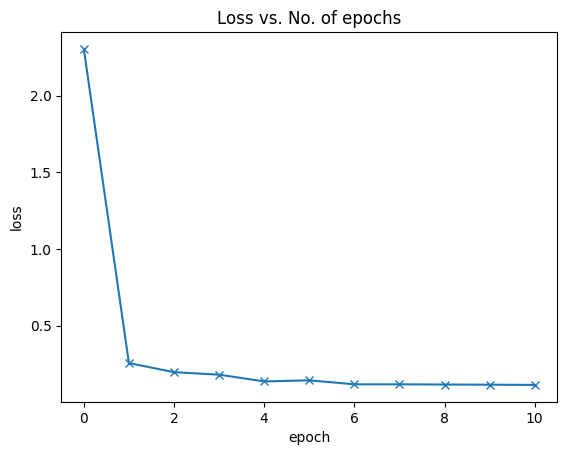

In [288]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

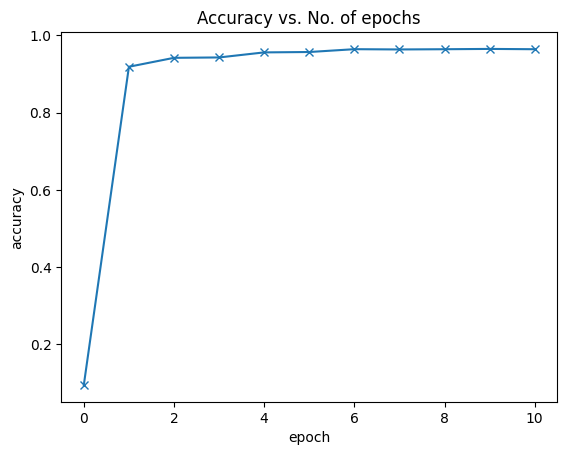

In [289]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

Our current model outperforms the logistic regression model (which could only achieve around 86% accuracy) by a considerable margin! It quickly reaches an accuracy of 97% but doesn't improve much beyond this. To improve accuracy further, we need to make the model more powerful by increasing the hidden layer's size or adding more hidden layers with activations. I encourage you to try out both these approaches and see which one works better.

#### 3.3(b) Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the `ToTensor` transform.

In [290]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=ToTensor())

Let's define a helper function `predict_image`, which returns the predicted label for a single image tensor.

In [291]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Let's try it out with a few images.

Label: 7 , Predicted: 7


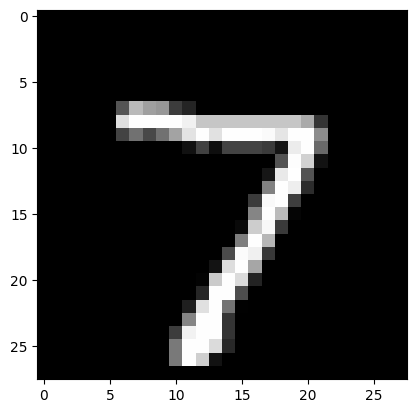

In [292]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 2


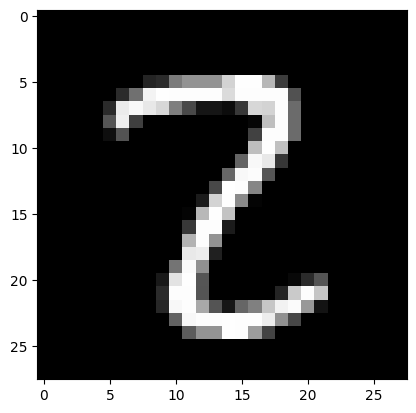

In [293]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


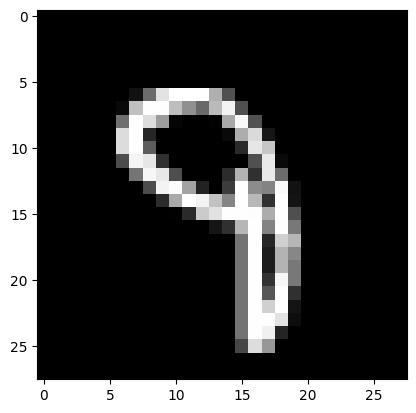

In [294]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [295]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.10359984636306763, 'val_acc': 0.9693359136581421}

We expect this to be similar to the accuracy/loss on the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

In [296]:
torch.save(model.state_dict(), 'mnist-feedforward.pth')

### `Exercises`

Try out the following exercises to apply the concepts and techniques you have learned so far:

* Coding exercises on end-to-end model training: https://jovian.ai/aakashns/03-cifar10-feedforward
* Starter notebook for deep learning models:  https://jovian.ai/aakashns/fashion-feedforward-minimal

Training great machine learning models reliably takes practice and experience. Try experimenting with different datasets, models and hyperparameters, it's the best way to acquire this skill.

### `Summary and Further Reading`

Here is a summary of the topics covered in this tutorial:

* We created a neural network with one hidden layer to improve upon the logistic regression model from the previous tutorial. We also used the ReLU activation function to introduce non-linearity into the model, allowing it to learn more complex relationships between the inputs (pixel densities) and outputs (class probabilities).

* We defined some utilities like `get_default_device`, `to_device` and `DeviceDataLoader` to leverage a GPU if available, by moving the input data and model parameters to the appropriate device.

* We were able to use the exact same training loop: the `fit` function we had define earlier to train out model and evaluate it using the validation dataset.

There's a lot of scope to experiment here, and I encourage you to use the interactive nature of Jupyter to play around with the various parameters. Here are a few ideas:

* Try changing the size of the hidden layer, or add more hidden layers and see if you can achieve a higher accuracy.

* Try changing the batch size and learning rate to see if you can achieve the same accuracy in fewer epochs.

* Compare the training times on a CPU vs. GPU. Do you see a significant difference. How does it vary with the size of the dataset and the size of the model (no. of weights and parameters)?

* Try building a model for a different dataset, such as the [CIFAR10 or CIFAR100 datasets](https://www.cs.toronto.edu/~kriz/cifar.html).

Here are some references for further reading:

* [A visual proof that neural networks can compute any function](http://neuralnetworksanddeeplearning.com/chap4.html), also known as the Universal Approximation Theorem.

* [But what *is* a neural network?](https://www.youtube.com/watch?v=aircAruvnKk) - A visual and intuitive introduction to what neural networks are and what the intermediate layers represent

* [Stanford CS229 Lecture notes on Backpropagation](https://github.com/BirajCoder/File-host-repo/blob/main/backprop.pdf) - for a more mathematical treatment of how gradients are calculated and weights are updated for neural networks with multiple layers.


You are now ready to move on to the next tutorial: [Image Classification using Convolutional Neural Networks](https://jovian.ai/aakashns/05-cifar10-cnn).